In [4]:
import numpy as np

# Load your calibration .npz file
data = np.load('MultiMatrix.npz')

# # Common calibration file keys (adjust based on your file structure)
# K = data['K']           # 3x3 intrinsics matrix
# D = data['D']           # Distortion coefficients [k1,k2,p1,p2[,k3]]
# width, height = data['width'], data['height']  # Image resolution

# # Extract for ORB-SLAM3 YAML
# fx, fy = K[0,0], K[1,1]
# cx, cy = K[0,2], K[1,2]
# k1, k2, p1, p2 = D[:4]   # First 4 distortion coeffs

# print("=== Copy these to your YAML ===")
# print(f"Camera.width: {int(width)}")
# print(f"Camera.height: {int(height)}")
# print(f"Camera.newWidth: {int(width)}") 
# print(f"Camera.newHeight: {int(height)}")
# print(f"Camera1.fx: {fx:.6f}")
# print(f"Camera1.fy: {fy:.6f}")
# print(f"Camera1.cx: {cx:.6f}")
# print(f"Camera1.cy: {cy:.6f}")
# print(f"Camera1.k1: {k1:.8f}")
# print(f"Camera1.k2: {k2:.8f}")
# print(f"Camera1.p1: {p1:.8f}")
# print(f"Camera1.p2: {p2:.8f}")

# # If your .npz has T_cam_imu or T_imu_cam
# if 'T_cam_imu' in data:
#     T = data['T_cam_imu']
#     print("\n=== IMU.T_b_c1 (flatten row-major) ===")
#     print("data: [", end="")
#     for i in range(4):
#         for j in range(4):
#             print(f"{T[i,j]:.10f}, ", end="")
#     print("0.0, 0.0, 0.0, 1.0]")
print(data)

NpzFile 'MultiMatrix.npz' with keys: camMatrix, distCoef, rVector, tVector


In [3]:
data['camMatrix']

array([[876.58388117,   0.        , 988.52249219],
       [  0.        , 875.69167147, 527.50461067],
       [  0.        ,   0.        ,   1.        ]])

In [5]:
data['distCoef']

array([[-0.0212738 ,  0.05926712, -0.00043674,  0.00102205, -0.06370663]])

In [7]:
import pandas as pd
df = pd.read_csv('imu_data_20251203_130847.csv')

In [8]:
df.describe()

,t,wx,wy,wz,ax,ay,az
count,1.006000e+06,1.006000e+06,1.006000e+06,1.006000e+06,1.006000e+06,1.006000e+06,1.006000e+06
mean,1.764751e+09,2.847629e-04,2.783612e-04,-2.548433e-04,3.561478e-04,1.339036e-03,5.614791e-02
std,4.063351e+02,2.056566e-03,2.519315e-03,1.076594e-03,2.907567e-02,1.932990e-02,2.171961e-02
min,1.764750e+09,-4.633901e-02,-5.113269e-02,-5.805691e-02,-1.318615e+00,-8.588434e-01,-7.568731e-01
25%,1.764750e+09,0.000000e+00,-5.326322e-04,-5.326322e-04,-6.358862e-03,-5.940795e-03,5.031967e-02
50%,1.764751e+09,5.326322e-04,5.326322e-04,0.000000e+00,8.169413e-04,9.933114e-04,5.696106e-02
75%,1.764751e+09,1.065264e-03,1.065264e-03,0.000000e+00,7.819295e-03,8.102059e-03,6.368351e-02
max,1.764751e+09,3.941479e-02,6.817693e-02,5.805691e-02,1.347060e+00,8.464968e-01,8.617859e-01


In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('imu_data_20251203_130847.csv')

# Check how many outliers
print("Gyro outliers (|w| > 0.01 rad/s):")
print(f"  wx: {(np.abs(df['wx']) > 0.01).sum()} samples ({100*(np.abs(df['wx']) > 0.01).mean():.3f}%)")
print(f"  wy: {(np.abs(df['wy']) > 0.01).sum()} samples ({100*(np.abs(df['wy']) > 0.01).mean():.3f}%)")
print(f"  wz: {(np.abs(df['wz']) > 0.01).sum()} samples ({100*(np.abs(df['wz']) > 0.01).mean():.3f}%)")

print("\nAccel outliers (|a| > 0.5 m/s²):")
print(f"  ax: {(np.abs(df['ax']) > 0.5).sum()} samples ({100*(np.abs(df['ax']) > 0.5).mean():.3f}%)")
print(f"  ay: {(np.abs(df['ay']) > 0.5).sum()} samples ({100*(np.abs(df['ay']) > 0.5).mean():.3f}%)")
print(f"  az: {(np.abs(df['az']) > 0.5).sum()} samples ({100*(np.abs(df['az']) > 0.5).mean():.3f}%)")


Gyro outliers (|w| > 0.01 rad/s):
  wx: 9888 samples (0.983%)
  wy: 13006 samples (1.293%)
  wz: 544 samples (0.054%)

Accel outliers (|a| > 0.5 m/s²):
  ax: 312 samples (0.031%)
  ay: 130 samples (0.013%)
  az: 152 samples (0.015%)


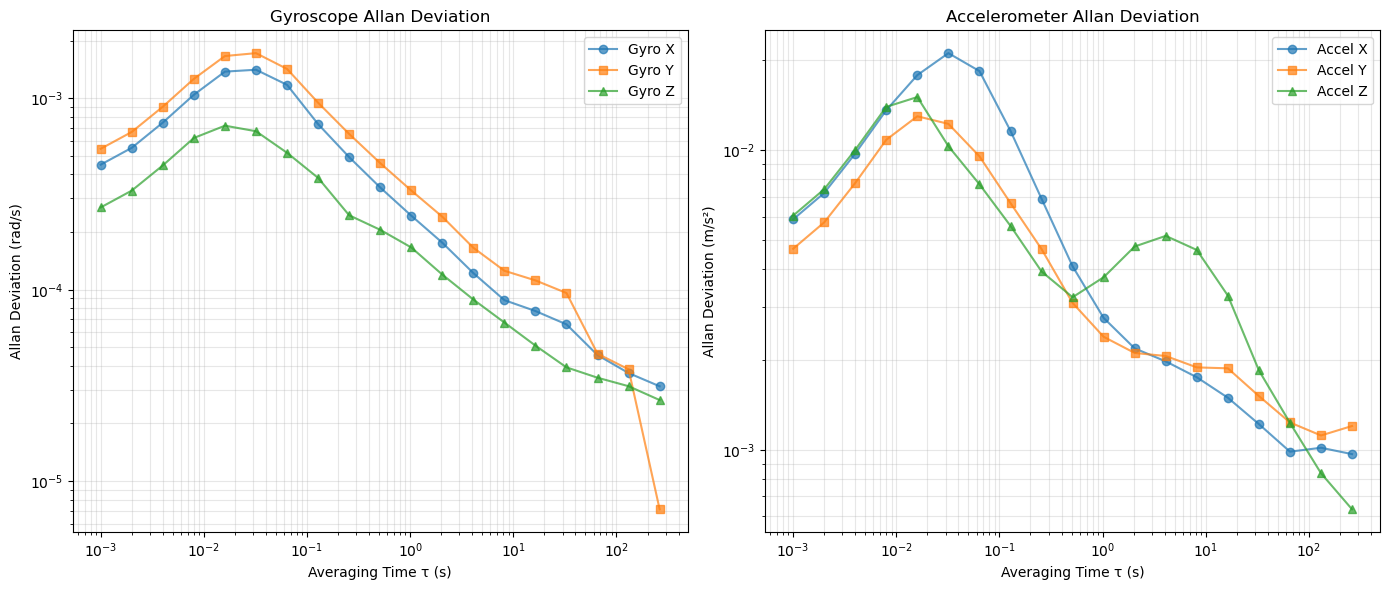


ORB-SLAM3 IMU PARAMETERS
IMU.NoiseGyro: 2.466943e-04  # rad/s/√Hz (Angle Random Walk)
IMU.NoiseAcc: 2.968247e-03   # m/s²/√Hz (Velocity Random Walk)
IMU.GyroWalk: 6.141439e-05   # rad/s²/√Hz (Rate Random Walk)
IMU.AccWalk: 1.713701e-03    # m/s³/√Hz (Accel Random Walk)
IMU.Frequency: 1000.0

Recommendation: Inflate GyroWalk and AccWalk by 2-5× for ORB-SLAM3
Suggested (conservative):
IMU.GyroWalk: 1.842432e-04
IMU.AccWalk: 5.141104e-03


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from allantools import oadev

# Load data
df = pd.read_csv('imu_data_20251203_130847.csv')

# Sampling rate
rate = 1000.0  # Hz

# Calculate Allan Deviation for each axis
def calculate_allan(data, rate, label):
    tau, adev, adev_err, n = oadev(data, rate=rate, data_type='freq')
    return tau, adev

# Process gyroscope data
tau_gx, adev_gx = calculate_allan(df['wx'].values, rate, 'Gyro X')
tau_gy, adev_gy = calculate_allan(df['wy'].values, rate, 'Gyro Y')
tau_gz, adev_gz = calculate_allan(df['wz'].values, rate, 'Gyro Z')

# Process accelerometer data
tau_ax, adev_ax = calculate_allan(df['ax'].values, rate, 'Accel X')
tau_ay, adev_ay = calculate_allan(df['ay'].values, rate, 'Accel Y')
tau_az, adev_az = calculate_allan(df['az'].values, rate, 'Accel Z')

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gyroscope Allan Deviation
ax1.loglog(tau_gx, adev_gx, 'o-', label='Gyro X', alpha=0.7)
ax1.loglog(tau_gy, adev_gy, 's-', label='Gyro Y', alpha=0.7)
ax1.loglog(tau_gz, adev_gz, '^-', label='Gyro Z', alpha=0.7)
ax1.set_xlabel('Averaging Time τ (s)')
ax1.set_ylabel('Allan Deviation (rad/s)')
ax1.set_title('Gyroscope Allan Deviation')
ax1.grid(True, which='both', alpha=0.3)
ax1.legend()

# Accelerometer Allan Deviation
ax2.loglog(tau_ax, adev_ax, 'o-', label='Accel X', alpha=0.7)
ax2.loglog(tau_ay, adev_ay, 's-', label='Accel Y', alpha=0.7)
ax2.loglog(tau_az, adev_az, '^-', label='Accel Z', alpha=0.7)
ax2.set_xlabel('Averaging Time τ (s)')
ax2.set_ylabel('Allan Deviation (m/s²)')
ax2.set_title('Accelerometer Allan Deviation')
ax2.grid(True, which='both', alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig('allan_variance_plot.png', dpi=150)
plt.show()

# Extract parameters at specific τ values
def extract_params(tau, adev):
    # Angle/Velocity Random Walk: τ = 1s
    idx_1s = np.argmin(np.abs(tau - 1.0))
    noise = adev[idx_1s]
    
    # Rate Random Walk: τ = 100s (or longest available)
    idx_100s = np.argmin(np.abs(tau - 100.0))
    walk = adev[idx_100s] * np.sqrt(3)  # Convert to rate random walk
    
    return noise, walk

# Calculate average parameters
gyro_noise = []
gyro_walk = []
for tau, adev in [(tau_gx, adev_gx), (tau_gy, adev_gy), (tau_gz, adev_gz)]:
    n, w = extract_params(tau, adev)
    gyro_noise.append(n)
    gyro_walk.append(w)

accel_noise = []
accel_walk = []
for tau, adev in [(tau_ax, adev_ax), (tau_ay, adev_ay), (tau_az, adev_az)]:
    n, w = extract_params(tau, adev)
    accel_noise.append(n)
    accel_walk.append(w)

# Print ORB-SLAM3 parameters
print("\n" + "="*60)
print("ORB-SLAM3 IMU PARAMETERS")
print("="*60)
print(f"IMU.NoiseGyro: {np.mean(gyro_noise):.6e}  # rad/s/√Hz (Angle Random Walk)")
print(f"IMU.NoiseAcc: {np.mean(accel_noise):.6e}   # m/s²/√Hz (Velocity Random Walk)")
print(f"IMU.GyroWalk: {np.mean(gyro_walk):.6e}   # rad/s²/√Hz (Rate Random Walk)")
print(f"IMU.AccWalk: {np.mean(accel_walk):.6e}    # m/s³/√Hz (Accel Random Walk)")
print(f"IMU.Frequency: {rate}")
print("="*60)
print("\nRecommendation: Inflate GyroWalk and AccWalk by 2-5× for ORB-SLAM3")
print(f"Suggested (conservative):")
print(f"IMU.GyroWalk: {np.mean(gyro_walk)*3:.6e}")
print(f"IMU.AccWalk: {np.mean(accel_walk)*3:.6e}")
